# Load the Dataset

In [15]:
import pandas as pd

data=pd.read_csv("E:/Shuvo/phase1.csv")
x = data.drop('label', axis=1)
y = data['label']

# Feature Selection Algorithm 1: Pearson Correlation

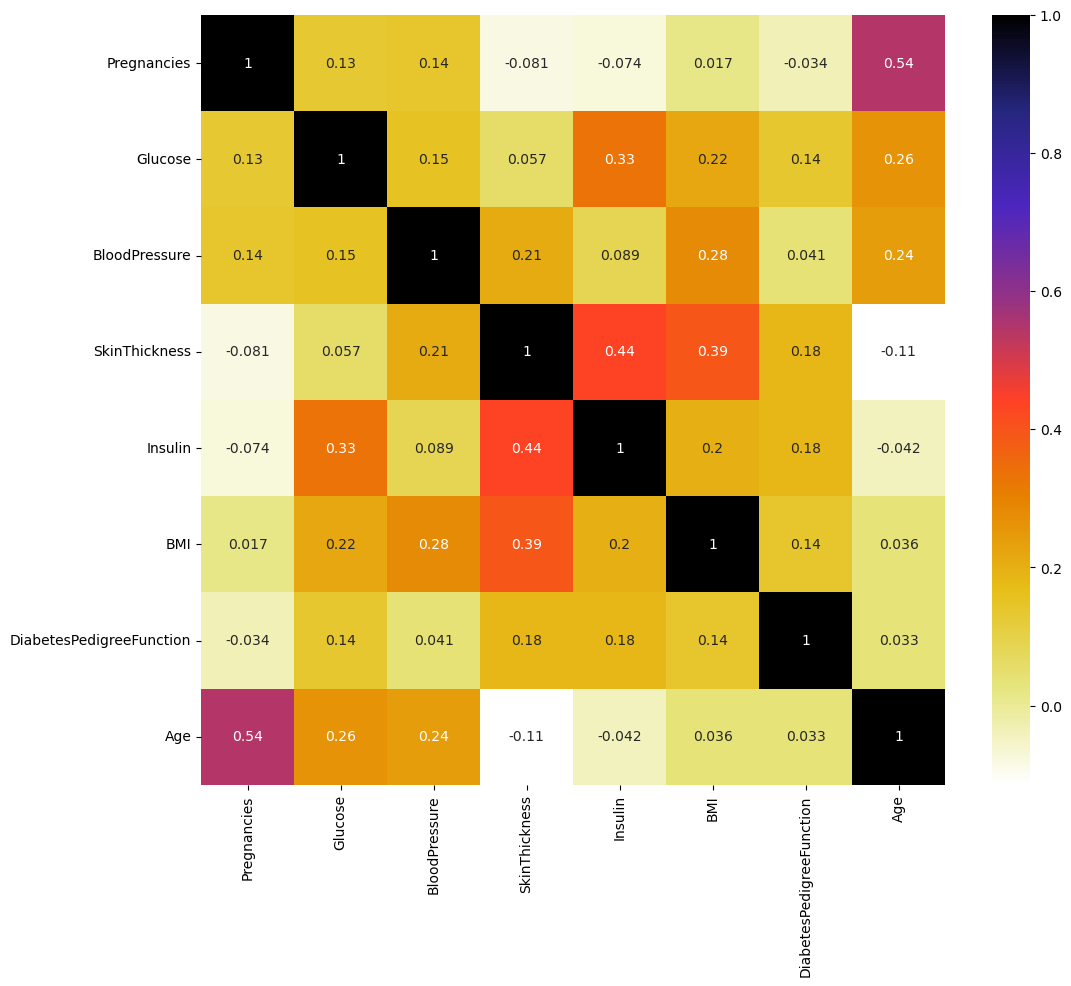

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(x, 0.5)
len(set(corr_features))

1

In [19]:
corr_features

{'Age'}

In [20]:
df1=x.drop(corr_features,axis=1)
df1['label']=y
df1.to_csv('E:/Shuvo/Dataset_1.csv')

# Feature Selection Algorithm 2: Recursive Feature Elimination with Cross-Validation (RFECV)

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)

rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy')
rfecv = rfecv.fit(x, y)
cols = rfecv.get_support(indices=True)
features = x.columns[cols]
features

Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [23]:
df4 = data.drop(data.columns.difference(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']) , axis=1)
df4['label']=y
df4.to_csv('E:/Shuvo/Dataset_2.csv')

# Feature Selection Algorithm 3: Lsso

In [24]:
# lasso regression feature selection
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

width_in_inches = 250
height_in_inches = 250
dots_in_inch = 10

lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(x,y).coef_
print(lasso_coef)

[ 0.16705274  0.93498189 -0.          0.          0.          0.1636436
  0.          0.02285729]


In [25]:
import numpy as np
names = data.drop('label',axis=1).columns
np.array(names)[(lasso_coef > 0.1)] 

array(['Pregnancies', 'Glucose', 'BMI'], dtype=object)

In [26]:
df6 = data.drop(data.columns.difference(['Pregnancies', 'Glucose', 'BMI']) , axis=1)
df6['label']=y
df6.to_csv('E:/Shuvo/Dataset_3.csv')